# Introduction au DQN avec PyTorch et gym

Dans ce TP, vous allez apprendre à créer un réseau de neurones profond d'estimation de la qualité (DQN) pour résoudre des problèmes d'apprentissage par renforcement en utilisant PyTorch et gym.

Pour ce faire, vous allez suivre les étapes suivantes:

-    Installer PyTorch et gym sur votre ordinateur
-    Définir un modèle DQN simple en utilisant PyTorch
-    Entraîner le modèle DQN en itérant sur des épisodes de l'environnement
-    Expérimenter avec différents environnements, hyperparamètres et architectures pour voir comment ils affectent la performance du DQN

Avant de commencer, assurez-vous d'avoir installé Python 3 et les bibliothèques nécessaires sur votre ordinateur. Si vous avez des 
questions, n'hésitez pas à demander de l'aide à votre enseignant ou à vos camarades. Bon travail!

#### Rappels

Le DQN apprend à jouer à un jeu en interagissant avec l'environnement et en essayant de maximiser la récompense future. Il fait cela en utilisant un réseau de neurones pour estimer la fonction de valeur, qui est une estimation de la somme des récompenses futures attendues à partir de l'état et de l'action actuels. Le DQN apprend à jouer en prenant des actions qui maximisent la fonction de valeur estimée et en ajustant ses paramètres en fonction de la différence entre la fonction de valeur estimée et la cible de la fonction de valeur.

#### Objectifs

-    Apprendre les concepts de base de l'apprentissage par renforcement et de l'estimation de la qualité
-    Installer et utiliser PyTorch et gym pour créer des modèles DQN
-    Comprendre les différents éléments d'un DQN, tels que les fonctions de perte et d'optimisation
-    Expérimenter avec différents environnements, hyperparamètres et architectures pour améliorer la performance du DQN

En réalisant ce TP, les étudiants devraient être en mesure de créer des modèles DQN simples et d'utiliser les outils PyTorch et gym pour les entraîner et les tester. Ils devraient également comprendre comment différents éléments d'un DQN peuvent affecter son apprentissage et sa performance.

#### Ressources

Voici une liste de ressources que vous pouvez utiliser en complément du cours pour en savoir plus sur les DQN, PyTorch et l'apprentissage par renforcement:

-    Vidéos sur YouTube:
        - [Introduction to Deep Q-Networks (DQN) with PyTorch](https://www.youtube.com/watch?v=MtMeio2R0Dk)
        - [PyTorch Tutorial for Beginners (Full Course)](https://www.youtube.com/watch?v=VZYc_ZHrruE)
        - [Reinforcement Learning Basics with OpenAI Gym](https://www.youtube.com/watch?v=Q-BpqyOT3a8)
-    Livres:
        - [Deep Learning with PyTorch](https://www.amazon.com/Deep-Learning-PyTorch-Vishnu-Subramanian/dp/1492045527)
        - [Reinforcement Learning: An Introduction](https://www.amazon.com/Reinforcement-Learning-Introduction-Richard-Sutton/dp/0262193981)
        - [Hands-On Reinforcement Learning with PyTorch](https://www.amazon.com/Hands-Reinforcement-Learning-PyTorch-Approach/dp/1838649322)

Ces ressources vous permettront de vous familiariser avec les concepts de base des DQN, de PyTorch et de l'apprentissage par renforcement, et de vous fournir des exemples et des astuces pour utiliser ces outils dans vos propres projets. Vous pouvez également consulter d'autres ressources en ligne, telles que des tutoriels, des forums et des documentations pour en apprendre davantage.

#### RAPPEL : 1/4 de la note finale est liée à la mise en forme : 

- Pensez à nettoyer les outputs inutiles (installation, messages de débuggage, ...)
- Soignez vos figures : les axes sont-ils faciles à comprendre ? L'échelle est adaptée ? 
- Commentez vos résultats : vous attendiez-vous à les avoir ? Est-ce étonnant ? Faites le lien avec la théorie.

Ce TP reprend l'exemple d'un médecin et de ses vaccins. Vous allez comparer plusieurs stratégies et trouver celle optimale.
Un TP se fait en groupe de 2 à 4. Aucun groupe de plus de 4 personnes. 

Vous allez rendre le TP dans une archive ZIP. L'archive ZIP contient ce notebook au format `ipynb`, mais aussi exporté en PDF & HTML. 
L'archive ZIP doit aussi contenir un fichier txt appelé `groupe.txt` sous le format:

```
Nom1, Prenom1, Email1, NumEtudiant1
Nom2, Prenom2, Email2, NumEtudiant2
Nom3, Prenom3, Email3, NumEtudiant3
Nom4, Prenom4, Email4, NumEtudiant4
```

Un script vient extraire vos réponses : ne changez pas l'ordre des cellules et soyez sûrs que les graphes sont bien présents dans la version notebook soumise. 

**Q1: Quelle est la différence entre un réseau neuronal profond (DQN) et un réseau neuronal classique ?**

La principale différence entre un réseau neuronal profond et un réseau neuronal classique est que les réseaux neuronaux profonds ont plusieurs couches cachées, ce qui leur permet d'apprendre des modèles plus complexes à partir de données. Les réseaux neuronaux classiques, en revanche, ont généralement seulement une seule couche cachée, ce qui limite leur capacité à apprendre des modèles complexes. Les réseaux neuronaux profonds sont donc souvent plus performants que les réseaux neuronaux classiques pour des tâches telles que la reconnaissance d'images ou le traitement du langage naturel.

**Q2. Dans quel type de problème est utilisé le DQN ?**

Dans un problème d'apprentissage par renforcement, l'objectif est de prendre des décisions pour maximiser une récompense à long terme. Le DQN est entraîné pour prédire la récompense future associée à chaque action possible dans un environnement donné, afin de déterminer la meilleure action à prendre. Par exemple, le DQN pourrait être utilisé pour entraîner un robot à se déplacer dans un environnement complexe en prenant des décisions pour éviter les obstacles et atteindre ses objectifs.

**Q3. Quelle est la différence entre l'espace des actions et des états dans l'environnement [`mountaincar-v0`](https://gym.openai.com/envs/MountainCar-v0/) et `cartpole-v0` ? Comment pouvez-vous visualiser cet environnement ?**

In [2]:
%pip install gym

Defaulting to user installation because normal site-packages is not writeable
  Using cached gym-0.26.2.tar.gz (721 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached gym_notices-0.0.8-py3-none-any.whl (3.0 kB)
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827634 sha256=d6c718a49f91783c3185bdc2c659d7917657b9d793d16baa74193f084ee6e54d
  Stored in directory: /home/unikarah/.cache/pip/wheels/ae/5f/67/64914473eb34e9ba89dbc7eefe7e9be8f6673fbc6f0273b29f
Successfully built gym
Note: you may need to restart the kernel to use updated packages.


Shape of the action space of environement ()
Observation space of environement (2,)


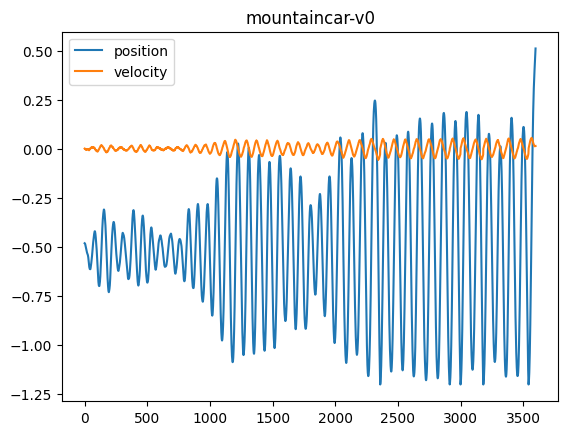

/home/unikarah/.local/lib/python3.10/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


Shape of the action space of environement ()
Observation space of environement (4,)


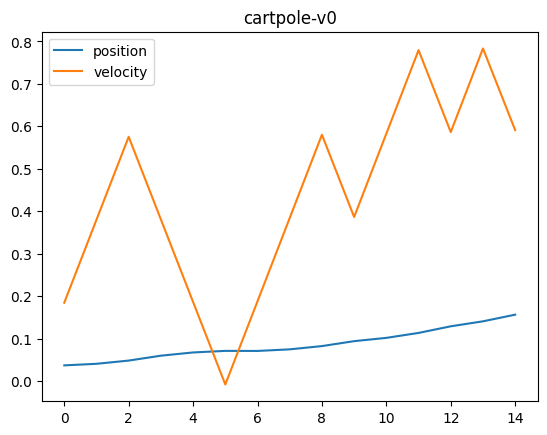

In [36]:
import gym
import matplotlib.pyplot as plt

def visualize(env, title):
    # set the initial state of the environment
    state = env.reset()
    print("Shape of the action space of environement", env.action_space.shape)
    print("Observation space of environement", env.observation_space.shape)

    # initialize an empty list to store the state history
    state_history = []

    # define the number of steps to run the simulation for
    num_steps = 10000

    # run the simulation for the specified number of steps
    for step in range(num_steps):
        # choose a random action
        action = env.action_space.sample()
    
        # take a step in the environment using the chosen action
        state, reward, done, info, _ = env.step(action)
    
        # add the new state to the state history
        state_history.append(state)
    
        # check if the simulation is done
        if done:
            break

    # extract the position and velocity data from the state history
    positions = [s[0] for s in state_history]
    velocities = [s[1] for s in state_history]

    # plot the position and velocity data
    plt.plot(positions, label='position')
    plt.plot(velocities, label='velocity')
    plt.legend()
    plt.title(title)
    plt.show()

mountaincar = gym.make("MountainCar-v0")
visualize(mountaincar, "mountaincar-v0")


cartpole = gym.make("CartPole-v0", render_mode="rgb_array")
visualize(cartpole, "cartpole-v0")


On peut visualiser l'environement via la positon et la vitesse de l'objet à travers une simulation de 1000 actions. 

Avec les deux courbes on peut observer l'évolution de la position et de la vitesse. On voit que dans le premier cas la vitesse reste plus ou moins stable mais que la position change énormément. Pour une voiture qui essaie de monter sur une montagne cela semble logique. Et pour le cartpole on voit que la position est stable ce qui nous permet de conclure que sur 1000 actions les décisions prises sont plutôt bonne.

# Implémentation du DQN

L'architecture neuronale pour résoudre le Deep Q-Learning (DQN) est un réseau de neurones profond. Il est composé d'une couche d'entrée, d'une couche cachée et d'une couche de sortie. La couche d'entrée prend en entrée les données de l'environnement (position et vitesse de la voiture) et les convertit en un vecteur d'entrée. La couche cachée est composée de plusieurs couches de neurones qui traitent les données et les convertissent en un vecteur de sortie. La couche de sortie prend en entrée le vecteur de sortie de la couche cachée et produit une action à effectuer (accélérer, freiner ou ne rien faire).

**Q4. Implémentez ce réseau.**

In [49]:
import torch
import torch.nn as nn
import numpy as np
from torch import optim

class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, output_dim)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
# FIXME


La fonction de perte est une fonction qui mesure la différence entre les valeurs prédites et les valeurs réelles. 
Dans le cas du DQN, la fonction de perte mesure la différence entre la valeur prédite par le réseau de neurones et la valeur réelle obtenue par l'environnement en utilisant la formule suivante :

La fonction de perte est donnée par :
$$L(\theta) = \mathbb{E}_{s_t,a_t \sim \rho(.)}[(Q_{\theta}(s_t,a_t) - y_t)^2],$$
où $\theta$ est le vecteur de paramètres du réseau de neurones, $\rho$ est la distribution de probabilité de l'état et de l'action, $Q_{\theta}$ est la fonction de valeur estimée par le réseau de neurones, et $y_t$ est la cible de la fonction de valeur.

$$y_t = \mathbb{E}_{s_{t+1},a_{t+1} \sim \rho(.)}[r(s_t,a_t) + \gamma \max_{a}Q_{\theta}(s_{t+1},a_{t+1})].$$


**Q5. Implémentez une fonction `compute_loss` telle que décrite par :**

```python
def compute_loss(
    model: nn.Module,
    state: torch.Tensor, 
    next_state: torch.Tensor,
    reward: torch.Tensor,
    action: torch.Tensor,
    done: torch.Tensor,
):
    """
    Compute the DQN agent loss
    """

    GAMMA = 0.99
    # Compute the Q values for the current state
    q_values = model(state)
    # Compute the Q values for the next state
    next_q_values = model(next_state)
    # Compute the Q value for the action taken
    q_value = q_values.gather(1, action.unsqueeze(-1)).squeeze(-1)
    # Compute the max Q value at the next state (for the next action)
    next_q_value = next_q_values.max(1)[0]
    # Compute the expected Q value
    expected_q_value = reward + GAMMA * next_q_value * (1 - done)
    # Return the loss (MSE between the expected and the actual Q values)
    return F.mse_loss(q_value, expected_q_value)
```

**Q6. Complétez le code suivant et tracez la courbe de la récompense.**

In [53]:
import typing as t
import gym
import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from collections import deque

# DQN Agent
class DQNAgent:
    def __init__(self, env, device):
        self.env = env
        self.device = device
        self.state_size = env.observation_space.shape[0]
        self.action_size = env.action_space.n
        self._memory: t.Deque[t.Tuple[np.ndarray, int, float, np.ndarray, bool]] = deque(maxlen=2000)
        self.batch_size = 32
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = DQN(self.state_size, self.action_size).to(self.device)
        return model

    def remember(self, state: np.ndarray, action: int, reward: float, next_state: np.ndarray, done: bool):
        self._memory.append((state, action, reward, next_state, done))

    def act(self, state: np.ndarray) -> int:
        # Exploration : choisir une action aléatoire avec une probabilité epsilon
        if np.random.rand() <= self.epsilon:
            return self.env.action_space.sample()
        else:
            q_values = self.model(torch.from_numpy(state).float().to(self.device))
            return torch.argmax(q_values).item()

    def replay(self):
        minibatch = random.sample(self._memory, self.batch_size)
        states = torch.from_numpy(np.vstack([x[0] for x in minibatch])).float().to(self.device)
        actions = torch.from_numpy(np.vstack([x[1] for x in minibatch])).long().to(self.device)
        rewards = torch.from_numpy(np.vstack([x[2] for x in minibatch])).float().to(self.device)
        next_states = torch.from_numpy(np.vstack([x[3] for x in minibatch])).float().to(self.device)
        dones = torch.from_numpy(np.vstack([x[4] for x in minibatch])).float().to(self.device)

        q_values = self.model(states)
        q_next_state = self.model(next_states)
        self.optimizer.zero_grad()

        # Optimisation du réseau de neurones
        loss = F.mse_loss(q_values, q_next_state)

        self.optimizer.step()

        # Réduction d'epsilon
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)


    def train(self, episodes: int):
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        scores = []
        with tqdm.tqdm(range(episodes)) as t:
            for e in t:
                state, _ = self.env.reset()
                done = False
                score = 0
                while not done:
                    action = self.act(state)
                    next_state, reward, done, _, _ = self.env.step(action)
                    self.remember(state, action, reward, next_state, done)
                    state = next_state
                    score += reward
                    if len(self._memory) > self.batch_size:
                        self.replay()
                scores.append(score)
                t.set_postfix(reward=score)
        return scores
    

# Initialize environment
env = gym.make('MountainCar-v0')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Initialize agent
agent = DQNAgent(env, device)

# Train agent
scores = agent.train(episodes=1000)

  0%|          | 3/1000 [00:26<2:28:31,  8.94s/it, reward=-10840.0]


KeyboardInterrupt: 

**Q7. Visualisez la vidéo d'un cas d'échec et d'un cas de réussite.**

In [ ]:
# Ajoutez votre code ici

*[Ajoutez votre réponse ici]*

# Double DQN


Le Double DQN est un algorithme d'apprentissage par renforcement qui combine le DQN avec une technique appelée Prise de décision double. Le Double DQN permet à l'agent d'explorer plus intelligemment des environnements complexes et imprévisibles. L'algorithme est conçu pour maximiser la valeur estimée sur la base des informations disponibles.

L'algorithme commence par initialiser des paramètres pour le modèle de réseau neuronal profond et deux cibles de réseaux distincts, X et Y. Les deux cibles sont des copies parallèles, mais le modèle X est mis à jour plus fréquemment que le modèle Y. Quand un agent prend une action, il utilise le réseau X pour calculer la valeur estimée et recueille le feedback après l'action. L'agent utilise ensuite le réseau Y pour déterminer quelle était l'action optimale à partir de cette valeur estimée. 

Cette procédure est appelée *prise de décision double*. Elle réduit l'instabilité et les biais de l'exploration liés à la maximisation prématurée.

**Q8. Ajoutez le Double DQN sur votre implémentation précédente.**

In [ ]:
# Ajoutez votre code ici
        return model

    def remember(self, state: np.ndarray, action: int, reward: float, next_state: np.ndarray, done: bool):
        self._memory.append((state, action, reward, next_state, done))

    def act(self, state: np.ndarray) -> int:
        # Exploration : choisir une action aléatoire avec une probabilité epsilon
        # Ajoutez votre code ici
        
        # Choisir une action à partir du modèle
        # Ajoutez votre code ici

    def replay(self):
        minibatch = random.sample(self._memory, self.batch_size)
        states = torch.from_numpy(np.vstack([x[0] for x in minibatch])).float().to(self.device)
        actions = torch.from_numpy(np.vstack([x[1] for x in minibatch])).long().to(self.device)
        rewards = torch.from_numpy(np.vstack([x[2] for x in minibatch])).float().to(self.device)
        next_states = torch.from_numpy(np.vstack([x[3] for x in minibatch])).float().to(self.device)
        dones = torch.from_numpy(np.vstack([x[4] for x in minibatch])).float().to(self.device)
        
        q_values = self.model(states)
        q_next_state = self.model(next_states)
        self.optimizer.zero_grad()
        
        # Optimisation du réseau de neurones
        # Ajoutez votre code ici
        
        self.optimizer.step()

        # Réduction d'epsilon
        # Ajoutez votre code ici

    def train(self, episodes):
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        scores = []
        for e in tqdm.tqdm(range(episodes)):
            state, _ = self.env.reset()
            done = False
            score = 0
            while not done:
                action = self.act(state)
                next_state, reward, done, _, _ = self.env.step(action)
                self.remember(state, action, reward, next_state, done)
                state = next_state
                score += reward
                if len(self._memory) > self.batch_size:
                    self.replay()
            scores.append(score)
            if e % 10 == 0:
                self.target_model.load_state_dict(self.model.state_dict())
        return scores
    

# Initialize environment
env = gym.make('MountainCar-v0')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Initialize agent
agent = DDQNAgent(env, device)

# Train agent
scores = agent.train(episodes=1000)
# Solution fin

*[Ajoutez votre réponse ici]*

**Q9. En cherchant sur Internet, proposez une série d'améliorations possibles et décrivez les**

*[Ajoutez votre réponse ici]*